In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = sns.load_dataset('mpg')

In [3]:
with pd.option_context('display.max_rows', 5, 
                       'display.max_columns', None):
    display(df)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
...,...,...,...,...,...,...,...,...,...
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


## Exploratory Data Analysis & Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [37]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [38]:
df['origin'].value_counts()

origin
usa       249
japan      79
europe     70
Name: count, dtype: int64

In [42]:
df['origin'] = df['origin'].astype('category')

In [39]:
df['name'].value_counts().sort_index()

name
amc ambassador brougham                 1
amc ambassador dpl                      1
amc ambassador sst                      1
amc concord                             2
amc concord d/l                         1
amc concord dl                          1
amc concord dl 6                        1
amc gremlin                             4
amc hornet                              4
amc hornet sportabout (sw)              1
amc matador                             5
amc matador (sw)                        2
amc pacer                               1
amc pacer d/l                           1
amc rebel sst                           1
amc spirit dl                           1
audi 100 ls                             1
audi 100ls                              2
audi 4000                               1
audi 5000                               1
audi 5000s (diesel)                     1
audi fox                                1
bmw 2002                                1
bmw 320i                     

In [44]:
df[['make', 'model']] = df['name'].str.split(n=1, expand=True)

In [45]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,make,model
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet,chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick,skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth,satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc,rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford,torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500,ford,galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala,chevrolet,impala
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii,plymouth,fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina,pontiac,catalina
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl,amc,ambassador dpl


In [46]:
df['make'].value_counts().sort_index()

make
amc              28
audi              7
bmw               2
buick            17
cadillac          2
capri             1
chevroelt         1
chevrolet        43
chevy             3
chrysler          6
datsun           23
dodge            28
fiat              8
ford             51
hi                1
honda            13
maxda             2
mazda            10
mercedes          1
mercedes-benz     2
mercury          11
nissan            1
oldsmobile       10
opel              4
peugeot           8
plymouth         31
pontiac          16
renault           5
saab              4
subaru            4
toyota           25
toyouta           1
triumph           1
vokswagen         1
volkswagen       15
volvo             6
vw                6
Name: count, dtype: int64

In [47]:
fix_typos = {
    'capri': 'ford',
    'chevy': 'chevrolet',
    'chevroelt': 'chevrolet',
    'maxda': 'mazda',
    'mercedes-benz': 'mercedes',
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen'
}

df['make'] = df['make'].replace(fix_typos)

In [48]:
df['make'].value_counts().sort_index()

make
amc           28
audi           7
bmw            2
buick         17
cadillac       2
chevrolet     47
chrysler       6
datsun        23
dodge         28
fiat           8
ford          52
hi             1
honda         13
mazda         12
mercedes       3
mercury       11
nissan         1
oldsmobile    10
opel           4
peugeot        8
plymouth      31
pontiac       16
renault        5
saab           4
subaru         4
toyota        26
triumph        1
volkswagen    22
volvo          6
Name: count, dtype: int64

In [49]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,make,model
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet,chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick,skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth,satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc,rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford,torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500,ford,galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala,chevrolet,impala
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii,plymouth,fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina,pontiac,catalina
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl,amc,ambassador dpl


### Remove rows with missing values

In [63]:
df.isna().any()

mpg             False
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
model_year      False
origin          False
name            False
make            False
model            True
dtype: bool

In [64]:
df[df.isna().any(axis=1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,make,model
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto,ford,pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick,ford,maverick
150,26.0,4,108.0,93.0,2391,15.5,74,japan,subaru,subaru,None
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe,renault,lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra,ford,mustang cobra
346,32.3,4,97.0,67.0,2065,17.8,81,japan,subaru,subaru,None
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i,renault,18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl,amc,concord dl


In [67]:
df.dropna(subset='horsepower', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           392 non-null    float64 
 1   cylinders     392 non-null    int64   
 2   displacement  392 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        392 non-null    int64   
 5   acceleration  392 non-null    float64 
 6   model_year    392 non-null    int64   
 7   origin        392 non-null    category
 8   name          392 non-null    object  
 9   make          392 non-null    object  
 10  model         390 non-null    object  
dtypes: category(1), float64(4), int64(3), object(3)
memory usage: 34.2+ KB


## Analysis

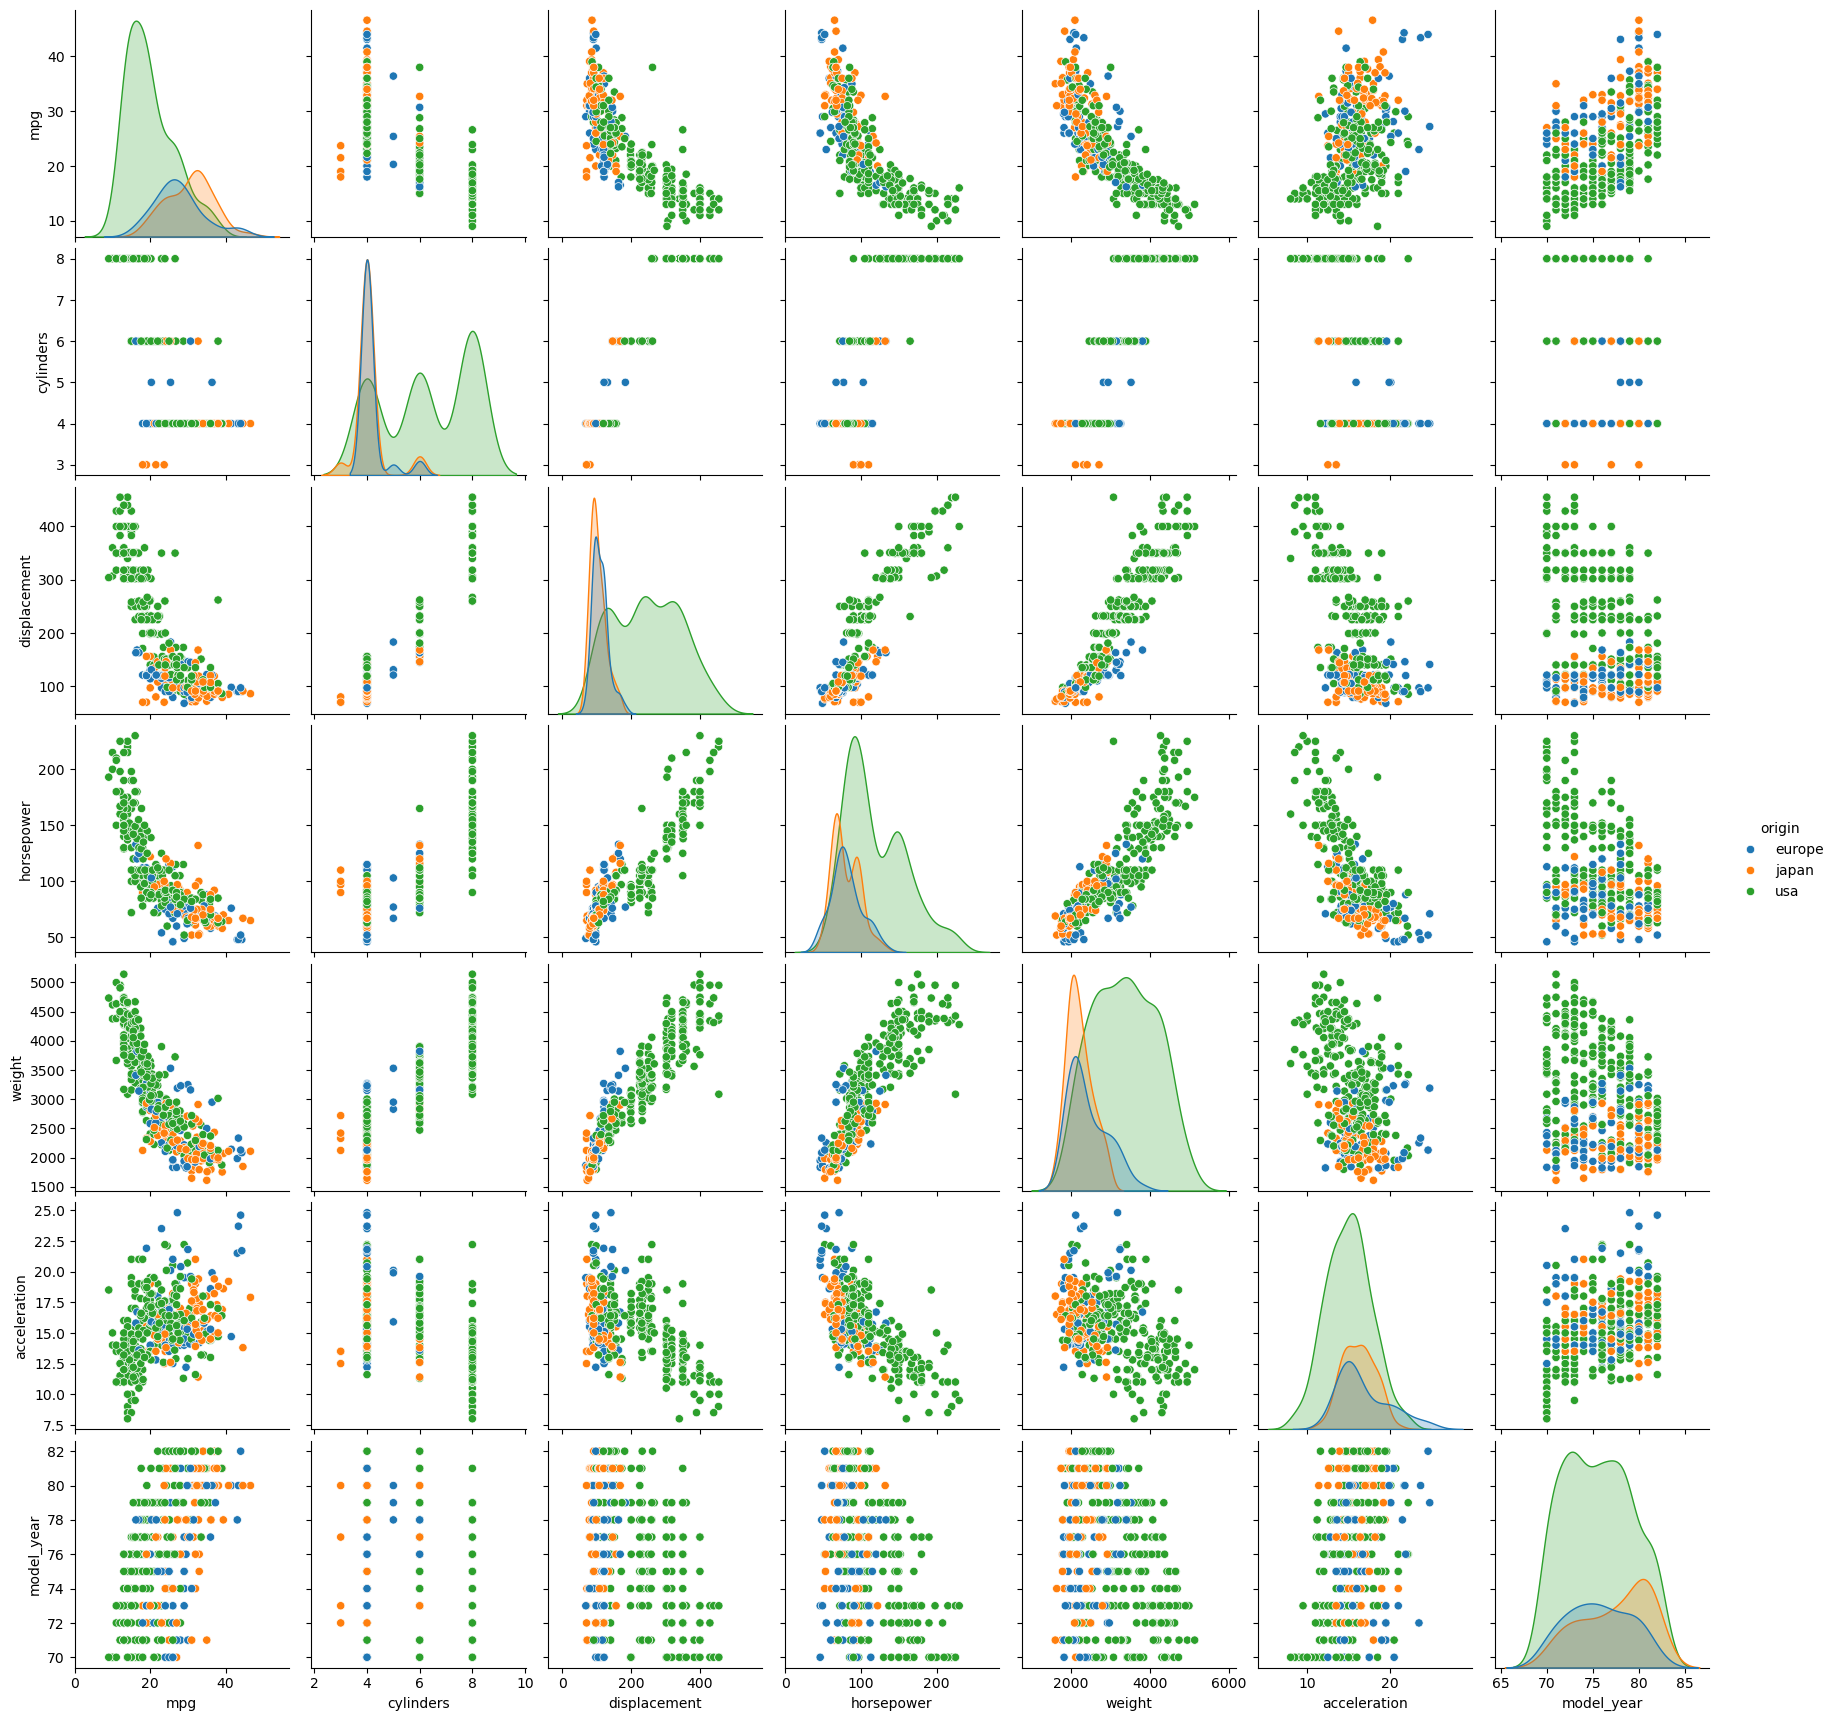

In [68]:
sns.pairplot(data=df, hue='origin');

<Axes: >

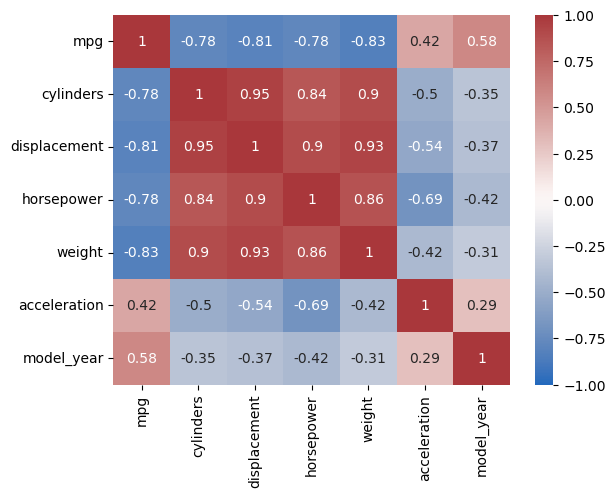

In [72]:
df_num = df.select_dtypes(['int','float'])
df_corr = df_num.corr()
sns.heatmap(data = df_corr, annot=True, cmap='vlag', vmin=-1, vmax=1, fmt='.2g')

In [73]:
df.sort_values('mpg').head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,make,model
28,9.0,8,304.0,193.0,4732,18.5,70,usa,hi 1200d,hi,1200d
26,10.0,8,307.0,200.0,4376,15.0,70,usa,chevy c20,chevrolet,c20
25,10.0,8,360.0,215.0,4615,14.0,70,usa,ford f250,ford,f250
27,11.0,8,318.0,210.0,4382,13.5,70,usa,dodge d200,dodge,d200
124,11.0,8,350.0,180.0,3664,11.0,73,usa,oldsmobile omega,oldsmobile,omega


In [74]:
df.sort_values('mpg', ascending=False).head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,make,model
322,46.6,4,86.0,65.0,2110,17.9,80,japan,mazda glc,mazda,glc
329,44.6,4,91.0,67.0,1850,13.8,80,japan,honda civic 1500 gl,honda,civic 1500 gl
325,44.3,4,90.0,48.0,2085,21.7,80,europe,vw rabbit c (diesel),volkswagen,rabbit c (diesel)
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,volkswagen,pickup
326,43.4,4,90.0,48.0,2335,23.7,80,europe,vw dasher (diesel),volkswagen,dasher (diesel)


In [75]:
df['kml'] = (df['mpg'] * 1.609344 / 4.54609).round(1)

In [76]:
df[['mpg', 'kml']].sort_values('mpg')

,mpg,kml
28,9.0,3.2
26,10.0,3.5
25,10.0,3.5
27,11.0,3.9
124,11.0,3.9
103,11.0,3.9
67,11.0,3.9
104,12.0,4.2
69,12.0,4.2
42,12.0,4.2


In [86]:
bins = [0, 2500, 3500, 6000]
labels = ['light','medium','heavy']
df['weight_class'] = pd.cut(df['weight'], bins, labels = labels)

In [87]:
df['weight_class'].value_counts()

weight_class
light     144
medium    139
heavy     109
Name: count, dtype: int64

In [89]:
df.pivot_table(index = 'origin', 
               columns = 'weight_class', 
               aggfunc = 'size',
               values = 'mpg',
               fill_value = 0,
               observed = True)

weight_class,light,medium,heavy
origin,,,
europe,43,23,2
japan,62,17,0
usa,39,99,107


In [106]:
df.groupby('origin')[['weight','horsepower']].mean()

,weight,horsepower
origin,,
europe,2433.470588,80.558824
japan,2221.227848,79.835443
usa,3372.489796,119.048980


In [109]:
totals = df.groupby('origin')[['mpg','weight']].agg(['size', 'min','max','mean','median']).round(1)
totals

mpg                          weight                            
       size   min   max  mean median   size   min   max    mean  median
origin                                                                 
europe   68  16.2  44.3  27.6   26.0     68  1825  3820  2433.5  2240.0
japan    79  18.0  46.6  30.5   31.6     79  1613  2930  2221.2  2155.0
usa     245   9.0  39.0  20.0   18.5    245  1800  5140  3372.5  3381.0

<Axes: xlabel='origin'>

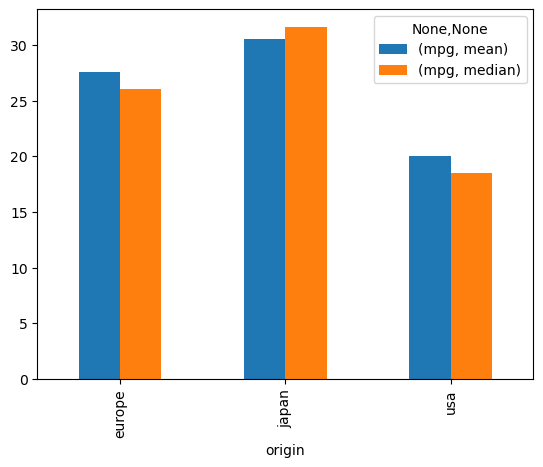

In [119]:
totals[[('mpg','mean'), ('mpg','median')]].plot.bar()

In [90]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,make,model,kml,weight_class
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet,chevelle malibu,6.4,heavy
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick,skylark 320,5.3,heavy
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth,satellite,6.4,medium
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc,rebel sst,5.7,medium
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford,torino,6.0,medium
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500,ford,galaxie 500,5.3,heavy
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala,chevrolet,impala,5.0,heavy
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii,plymouth,fury iii,5.0,heavy
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina,pontiac,catalina,5.0,heavy
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl,amc,ambassador dpl,5.3,heavy


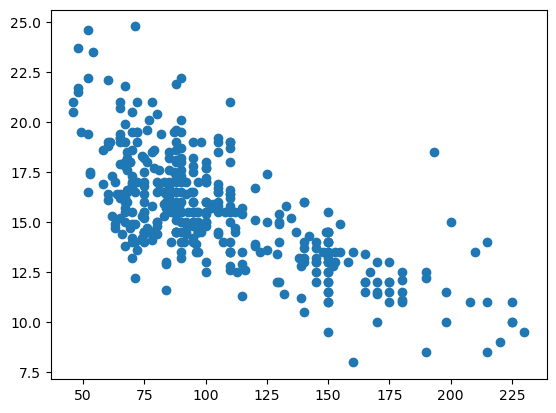

In [50]:
plt.scatter(df['horsepower'], df['acceleration'])

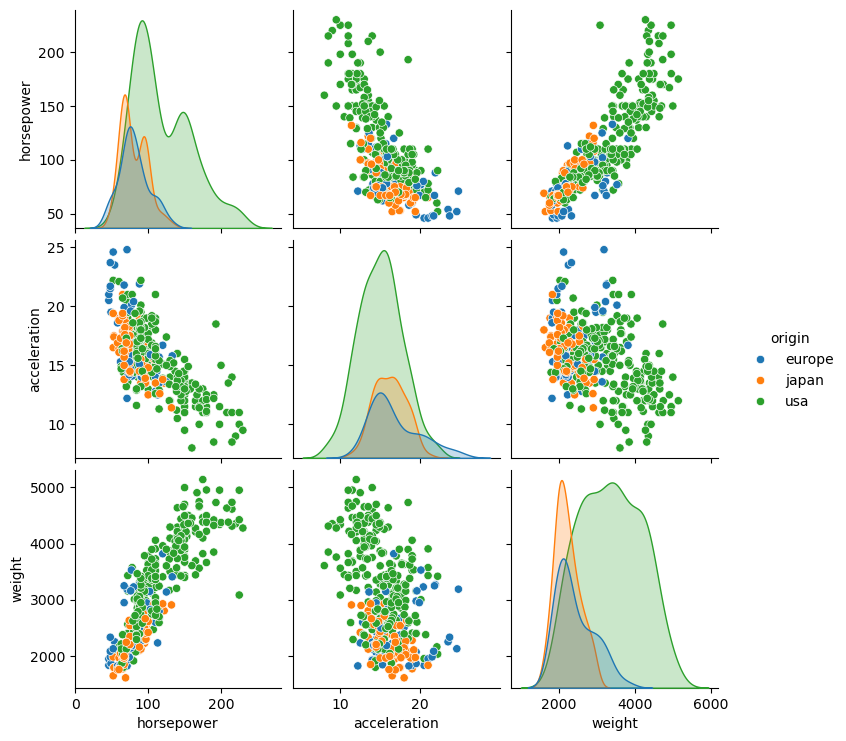

In [93]:
sns.pairplot(df[['horsepower','acceleration','weight','origin']], hue='origin')

<Axes: xlabel='horsepower', ylabel='acceleration'>

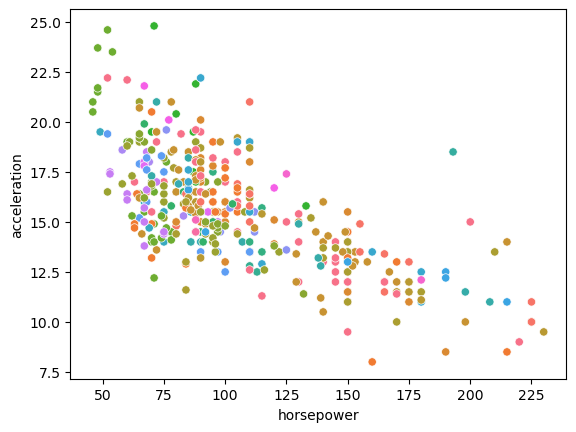

In [94]:
sns.scatterplot(data=df, x='horsepower', y='acceleration', hue='make', legend = False)

In [68]:
df.sort_values('horsepower', ascending = False).head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,make,model,kml
116,16.0,8,400.0,230.0,4278,9.5,73,usa,pontiac grand prix,pontiac,grand prix,5.664099
95,12.0,8,455.0,225.0,4951,11.0,73,usa,buick electra 225 custom,buick,electra 225 custom,4.248074
13,14.0,8,455.0,225.0,3086,10.0,70,usa,buick estate wagon (sw),buick,estate wagon (sw),4.956087
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina,pontiac,catalina,4.956087
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala,chevrolet,impala,4.956087


In [69]:
df[df['origin']=='usa']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,make,model,kml
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet,chevelle malibu,6.372111
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick,skylark 320,5.310093
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth,satellite,6.372111
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc,rebel sst,5.664099
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford,torino,6.018105
...,...,...,...,...,...,...,...,...,...,...,...,...
392,27.0,4,151.0,90.0,2950,17.3,82,usa,chevrolet camaro,chevrolet,camaro,9.558167
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,ford,mustang gl,9.558167
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,dodge,rampage,11.328198
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,ford,ranger,9.912173


In [74]:
df[ df['make']=='ford' ]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,make,model,kml
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford,torino,6.018105
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500,ford,galaxie 500,5.310093
17,21.0,6,200.0,85.0,2587,16.0,70,usa,ford maverick,ford,maverick,7.434130
25,10.0,8,360.0,215.0,4615,14.0,70,usa,ford f250,ford,f250,3.540062
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto,ford,pinto,8.850155
...,...,...,...,...,...,...,...,...,...,...,...,...
365,20.2,6,200.0,88.0,3060,17.1,81,usa,ford granada gl,ford,granada gl,7.150925
373,24.0,4,140.0,92.0,2865,16.4,82,usa,ford fairmont futura,ford,fairmont futura,8.496149
389,22.0,6,232.0,112.0,2835,14.7,82,usa,ford granada l,ford,granada l,7.788136
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,ford,mustang gl,9.558167


In [75]:
df[ ['origin','make','model'] ]

,origin,make,model
0,usa,chevrolet,chevelle malibu
1,usa,buick,skylark 320
2,usa,plymouth,satellite
3,usa,amc,rebel sst
4,usa,ford,torino
...,...,...,...
393,usa,ford,mustang gl
394,europe,volkswagen,pickup
395,usa,dodge,rampage
396,usa,ford,ranger


In [76]:
df.loc[ df['make']=='ford', ['origin','make','model'] ]

,origin,make,model
4,usa,ford,torino
5,usa,ford,galaxie 500
17,usa,ford,maverick
25,usa,ford,f250
32,usa,ford,pinto
...,...,...,...
365,usa,ford,granada gl
373,usa,ford,fairmont futura
389,usa,ford,granada l
393,usa,ford,mustang gl


<Axes: >

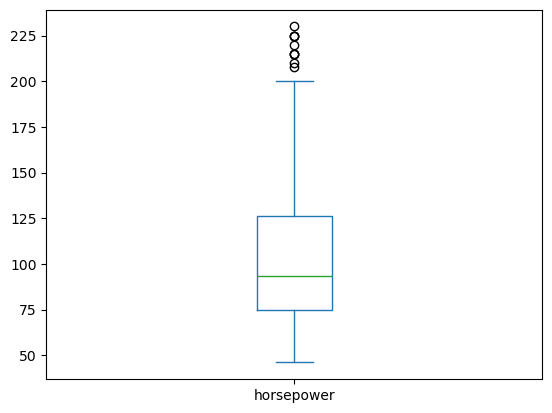

In [80]:
df['horsepower'].plot(kind='box')

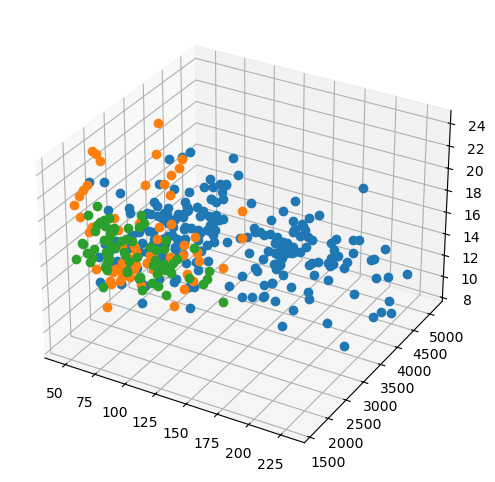

In [91]:
ax = plt.figure(figsize=(8, 6)).add_subplot(projection='3d')

dfx = df[df['origin']=='usa']
ax.plot(dfx['horsepower'], dfx['weight'], dfx['acceleration'], lw=0, marker='o')

dfx = df[df['origin']=='europe']
ax.plot(dfx['horsepower'], dfx['weight'], dfx['acceleration'], lw=0, marker='o')

dfx = df[df['origin']=='japan']
ax.plot(dfx['horsepower'], dfx['weight'], dfx['acceleration'], lw=0, marker='o')

plt.show()

## Categorical

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    int64   
 2   displacement  398 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        398 non-null    int64   
 5   acceleration  398 non-null    float64 
 6   model_year    398 non-null    int64   
 7   origin        398 non-null    object  
 8   name          398 non-null    object  
 9   make          398 non-null    object  
 10  model         396 non-null    object  
 11  kml           398 non-null    float64 
 12  weight_class  398 non-null    category
dtypes: category(1), float64(5), int64(3), object(4)
memory usage: 38.0+ KB


In [27]:
df['origin'] = df['origin'].astype('category')

In [28]:
df['origin'].cat.categories

Index(['europe', 'japan', 'usa'], dtype='object')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    int64   
 2   displacement  398 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        398 non-null    int64   
 5   acceleration  398 non-null    float64 
 6   model_year    398 non-null    int64   
 7   origin        398 non-null    category
 8   name          398 non-null    object  
 9   make          398 non-null    object  
 10  model         396 non-null    object  
 11  kml           398 non-null    float64 
 12  weight_class  398 non-null    category
dtypes: category(2), float64(5), int64(3), object(3)
memory usage: 35.4+ KB


In [87]:
bins = [0, 2000, 4000, 6000]
labels = ['light', 'medium', 'heavy']
df['weight_class'] = pd.cut(df['weight'], bins, labels = labels)

In [88]:
df['weight_class'].value_counts()

weight_class
medium    290
heavy      64
light      44
Name: count, dtype: int64

In [96]:
df.pivot_table(index = 'origin', 
               columns = 'weight_class', 
               aggfunc = 'mean',
               values = 'mpg',
               fill_value = 0,
               observed = False)

weight_class,light,medium,heavy
origin,,,
europe,31.217647,26.824528,0.000000
japan,34.413043,28.823214,0.000000
usa,34.200000,21.961878,13.889062


In [97]:
pd.crosstab(index = df['origin'], 
            columns = df['weight_class'],
            values = df['mpg'],
            aggfunc = 'mean'
           )

weight_class,light,medium,heavy
origin,,,
europe,31.217647,26.824528,NaN
japan,34.413043,28.823214,NaN
usa,34.200000,21.961878,13.889062


In [99]:
df.set_index('name')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,make,model,kml,weight_class
name,,,,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet,chevelle malibu,6.372111,medium
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa,buick,skylark 320,5.310093,medium
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth,satellite,6.372111,medium
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa,amc,rebel sst,5.664099,medium
ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa,ford,torino,6.018105,medium
...,...,...,...,...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,usa,ford,mustang gl,9.558167,medium
vw pickup,44.0,4,97.0,52.0,2130,24.6,82,europe,volkswagen,pickup,15.576272,medium
dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge,rampage,11.328198,medium


In [110]:
df_indexed = df.set_index(['origin', 'make', 'model']).sort_index()
df_indexed

mpg  cylinders  displacement  horsepower  \
origin make    model                                                      
europe audi    100 ls         24.0          4         107.0        90.0   
               100ls          20.0          4         114.0        91.0   
               100ls          23.0          4         115.0        95.0   
               4000           34.3          4          97.0        78.0   
               5000           20.3          5         131.0       103.0   
...                            ...        ...           ...         ...   
usa    pontiac phoenix        27.0          4         151.0        90.0   
               phoenix lj     19.2          6         231.0       105.0   
               safari (sw)    13.0          8         400.0       175.0   
               sunbird coupe  24.5          4         151.0        88.0   
               ventura sj     18.5          6         250.0       110.0   

                              weight  acceleration  model_year  \
origin make    model                                             
europe audi    100 ls           2430          14.5          70   
               100ls            2582          14.0          73   
               100ls            2694          15.0          75   
               4000             2188          15.8          80   
               5000             2830          15.9          78   
...                              ...           ...         ...   
usa    pontiac phoenix          2735          18.0          82   
               phoenix lj       3535          19.2          78   
               safari (sw)      5140          12.0          71   
               sunbird coupe    2740          16.0          77   
               ventura sj       3645          16.2          76   

                                               name        kml weight_class  
origin make    model                                                         
europe audi    100 ls                   audi 100 ls   8.496149       medium  
               100ls                     audi 100ls   7.080124       medium  
               100ls                     audi 100ls   8.142142       medium  
               4000                       audi 4000  12.142412       medium  
               5000                       audi 5000   7.186326       medium  
...                                             ...        ...          ...  
usa    pontiac phoenix              pontiac phoenix   9.558167       medium  
               phoenix lj        pontiac phoenix lj   6.796919       medium  
               safari (sw)      pontiac safari (sw)   4.602080        heavy  
               sunbird coupe  pontiac sunbird coupe   8.673152       medium  
               ventura sj        pontiac ventura sj   6.549115       medium  

[398 rows x 10 columns]

In [101]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,make,model,kml,weight_class
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet,chevelle malibu,6.372111,medium
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick,skylark 320,5.310093,medium
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth,satellite,6.372111,medium
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc,rebel sst,5.664099,medium
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford,torino,6.018105,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,ford,mustang gl,9.558167,medium
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,volkswagen,pickup,15.576272,medium
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,dodge,rampage,11.328198,medium
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,ford,ranger,9.912173,medium


In [117]:
df_indexed.loc[('usa', 'ford', 'torino')]

/var/folders/03/yj771kx92fj0g_3xbr70x6980000gn/T/ipykernel_18693/3508954183.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_indexed.loc[('usa', 'ford', 'torino')]


,,,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,name,kml,weight_class
origin,make,model,,,,,,,,,,
usa,ford,torino,17.0,8,302.0,140.0,3449,10.5,70,ford torino,6.018105,medium


In [118]:
df[['make','weight']].groupby('make').agg('mean').astype('int').sort_values('weight')

,weight
make,
honda,2023
volkswagen,2045
renault,2074
fiat,2143
subaru,2146
nissan,2160
opel,2200
mazda,2235
datsun,2242


<Axes: ylabel='Frequency'>

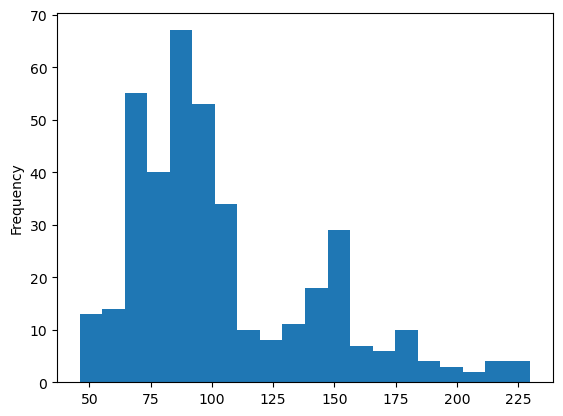

In [119]:
df['horsepower'].plot(kind='hist', bins=20)

<Axes: >

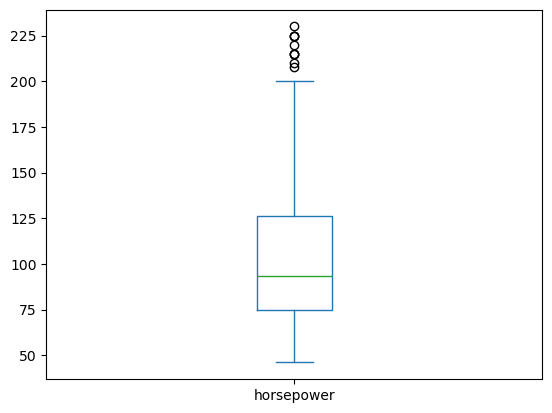

In [120]:
df['horsepower'].plot(kind='box')

<Axes: xlabel='horsepower'>

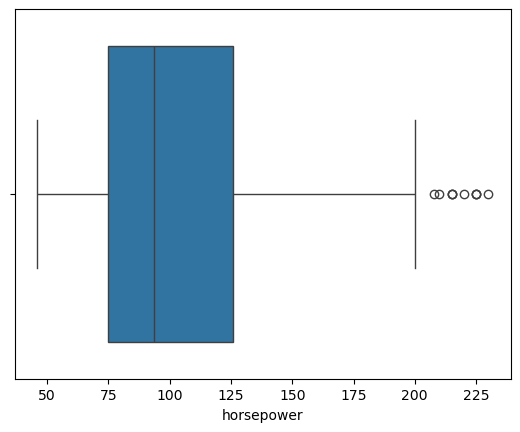

In [121]:
sns.boxplot(data=df, x='horsepower')

<Axes: xlabel='horsepower', ylabel='Count'>

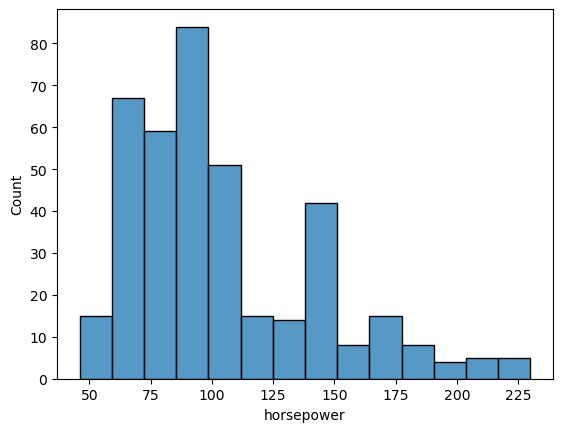

In [122]:
sns.histplot(data=df, x='horsepower')

<Axes: xlabel='mpg'>

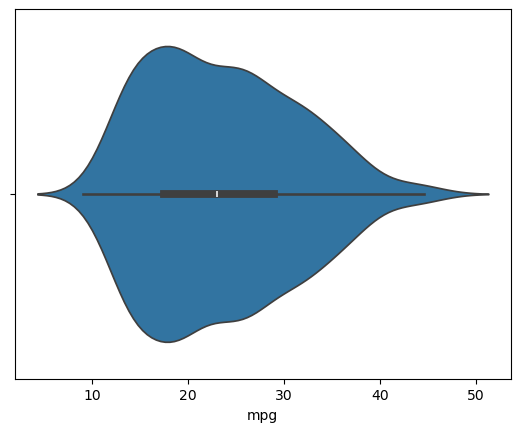

In [124]:
sns.violinplot(data=df, x='mpg')

<Axes: ylabel='make'>

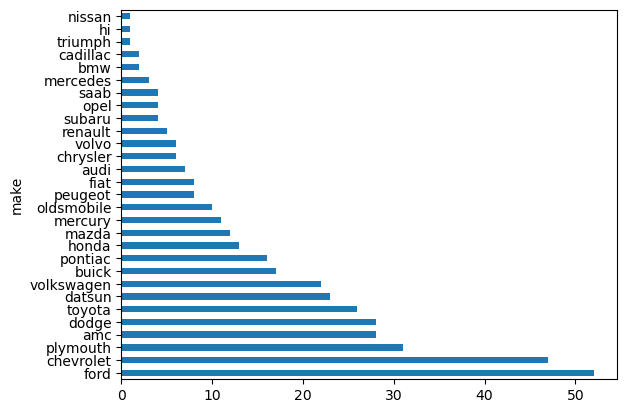

In [125]:
df['make'].value_counts().plot(kind='barh')

In [126]:
df['make'].unique

<bound method Series.unique of 0       chevrolet
1           buick
2        plymouth
3             amc
4            ford
          ...    
393          ford
394    volkswagen
395         dodge
396          ford
397     chevrolet
Name: make, Length: 398, dtype: object>